# Exploratory Data Analysis (EDA) - Data RUP 2025

## Tentang Dataset
Dataset ini berisi informasi **Rencana Umum Pengadaan (RUP) Paket Penyedia yang Terumumkan untuk tahun 2025**.

RUP adalah daftar rencana pengadaan barang/jasa yang akan dilaksanakan oleh K/L/PD selama 1 (satu) tahun anggaran yang berpedoman pada Rencana Kerja dan Anggaran.

## Tujuan Analisis
1. Memahami struktur dan karakteristik data RUP
2. Mengidentifikasi pola dan distribusi pengadaan
3. Analisis nilai pagu pengadaan
4. Analisis metode dan jenis pengadaan
5. Identifikasi K/L/PD dengan pengadaan terbanyak

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Konfigurasi display pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. Load Data

In [2]:
# Load data RUP
df = pd.read_parquet('../../../datasets/rup/RUP-PaketPenyedia-Terumumkan-2025.parquet')

print(f"✅ Data loaded successfully!")
print(f"📊 Total records: {len(df):,}")
print(f"📋 Total columns: {len(df.columns)}")

✅ Data loaded successfully!
📊 Total records: 16,430
📋 Total columns: 48


## 3. Data Inspection

In [3]:
# Tampilkan 5 baris pertama
print("📋 First 5 rows:")
df.head()

📋 First 5 rows:


,tahun_anggaran,kd_klpd,nama_klpd,jenis_klpd,kd_satker,kd_satker_str,nama_satker,kd_rup,nama_paket,pagu,kd_metode_pengadaan,metode_pengadaan,kd_jenis_pengadaan,jenis_pengadaan,status_pradipa,status_pdn,status_ukm,alasan_non_ukm,status_konsolidasi,tipe_paket,kd_rup_swakelola,kd_rup_lokal,volume_pekerjaan,urarian_pekerjaan,spesifikasi_pekerjaan,tgl_awal_pemilihan,tgl_akhir_pemilihan,tgl_awal_kontrak,tgl_akhir_kontrak,tgl_awal_pemanfaatan,tgl_akhir_pemanfaatan,tgl_buat_paket,tgl_pengumuman_paket,nip_ppk,nama_ppk,username_ppk,status_aktif_rup,status_delete_rup,status_umumkan_rup,status_dikecualikan,alasan_dikecualikan,tahun_pertama,kode_rup_tahun_pertama,nomor_kontrak,spp_aspek_ekonomi,spp_aspek_sosial,spp_aspek_lingkungan,_event_date
0,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264455,1.02.0.00.0.00.03.0000,RUMAH SAKIT JIWA PROVINSI KALIMANTAN BARAT,53540979,Belanja Bahan Makanan dan Minuman Pasien,7700000000,13,Tender,1,Barang,PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 paket,Belanja Bahan Makanan dan Minuman Pasien,Belanja Bahan Makanan dan Minuman Pasien,2024-11-01,2024-12-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2024-11-22,2024-11-22 22:22:47,197606132006041012,dr. Batara Hendra Putra Sianipar,batara.ppk24-97,True,False,Terumumkan,False,,None,None,None,False,False,False,2025-11-05
1,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53688068,Perencanaan Rehabilitasi Gedung UPT Pengujian ...,300000000,15,Seleksi,3,Jasa Konsultansi,Non-PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Melakukan Perencanaan Rehabilitasi Gedung UPT ...,Pekerjaan Konsultansi,2024-12-01,2025-02-01,2025-02-01,2025-04-01,2025-05-01,2025-12-01,2024-12-09,2024-12-09 15:52:13,198006122011011003,"ISFANDIAR, ST. MT.",isfandiar.ppk24-97,True,False,Terumumkan,False,None,None,None,None,False,False,False,2025-11-05
2,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53699505,PENGAWASAN TEKNIS PENGGANTIAN/PEMBANGUNAN JEMB...,1200000000,15,Seleksi,3,Jasa Konsultansi,PraDIPA,PDN,Non-UKM,Kompetensi tidak sesuai dengan usaha kecil,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Pengawasan Teknis pelaksanaan Pekerjaan Pemban...,Pengawasan Teknis Bidang Bina Marga,2024-12-01,2024-12-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2024-12-10,2024-12-16 14:25:38,196901141998031004,"HARDIAN, S.T., M.T.",hardian.ppk24-97,True,False,Terumumkan,False,None,None,None,None,True,True,True,2025-11-05
3,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53700150,PENGAWASAN TEKNIS PENINGKATAN JALAN TANJUNG M...,1200000000,15,Seleksi,3,Jasa Konsultansi,PraDIPA,PDN,Non-UKM,Kompetensi tidak sesuai dengan usaha kecil,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Pengawasan Teknis Pelaksanaan Pekerjaan Pening...,Pengawasan Teknis Bidang Bina Marga,2024-12-01,2024-12-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2024-12-10,2024-12-12 17:05:24,196901141998031004,"HARDIAN, S.T., M.T.",hardian.ppk24-97,True,False,Terumumkan,False,None,None,None,None,True,True,True,2025-11-05
4,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53700183,PENGAWASAN TEKNIS PENINGKATAN JALAN MARAU AIR...,1500000000,15,Seleksi,3,Jasa Konsultansi,PraDIPA,PDN,Non-UKM,Kompetensi tidak sesuai dengan usaha kecil,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Pengawasan Teknis Pelaksanaan Pekerjaan Pening...,Pengawasan Teknis Bidang Bina Marga,2024-12-01,2024-12-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2024-12-10,2024-12-12 17:05:24,196901141998031004,"HARDIAN, S.T., M.T.",hardian.ppk24-97,True,False,Terumumkan,False,None,None,None,None,True,True,True,2025-11-05


In [4]:
# Info dataset
print("ℹ️ Dataset Info:")
df.info()

ℹ️ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16430 entries, 0 to 16429
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tahun_anggaran          16430 non-null  int64         
 1   kd_klpd                 16430 non-null  object        
 2   nama_klpd               16430 non-null  object        
 3   jenis_klpd              16430 non-null  object        
 4   kd_satker               16430 non-null  int64         
 5   kd_satker_str           16430 non-null  object        
 6   nama_satker             16430 non-null  object        
 7   kd_rup                  16430 non-null  int64         
 8   nama_paket              16430 non-null  object        
 9   pagu                    16430 non-null  int64         
 10  kd_metode_pengadaan     16430 non-null  int64         
 11  metode_pengadaan        16430 non-null  object        
 12  kd_jenis_pengadaan      16429

In [5]:
# Deskripsi statistik untuk kolom numerik
print("📊 Statistical Description:")
df.describe()

📊 Statistical Description:


,tahun_anggaran,kd_satker,kd_rup,pagu,kd_metode_pengadaan,kd_rup_swakelola,tgl_pengumuman_paket
count,16430.00,16430.00,16430.00,16430.00,16430.00,14.00,16430
mean,2025.00,233311.01,58084327.33,128525019.61,8.97,40382347.29,2025-04-28 04:16:46.248448
min,2025.00,64173.00,53540979.00,1.00,7.00,40382253.00,2024-11-22 22:22:47
25%,2025.00,264449.00,56399054.25,1360000.00,8.00,40382289.00,2025-02-23 17:49:57
50%,2025.00,264464.00,58490153.00,8354500.00,9.00,40382335.00,2025-03-25 21:44:45
75%,2025.00,264488.00,59359089.50,91734075.00,9.00,40382412.00,2025-05-19 23:23:52.750000
max,2025.00,380858.00,61526448.00,74802424962.00,16.00,40382457.00,2025-11-04 23:43:59
std,0.00,67216.37,2151406.79,1217381191.99,1.39,76.62,NaN


In [6]:
# Cek missing values
print("🔍 Missing Values Analysis:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

🔍 Missing Values Analysis:
                        Missing Count  Percentage
kode_rup_tahun_pertama          16430      100.00
nomor_kontrak                   16430      100.00
tahun_pertama                   16430      100.00
kd_rup_lokal                    16430      100.00
kd_rup_swakelola                16416       99.91
alasan_non_ukm                  16362       99.59
alasan_dikecualikan             16112       98.06
nip_ppk                            39        0.24
username_ppk                       39        0.24
nama_ppk                           39        0.24
kd_jenis_pengadaan                  1        0.01
jenis_pengadaan                     1        0.01


## 4. Data Understanding

In [7]:
# Kolom-kolom penting
print("📌 Key Columns:")
key_columns = [
    'nama_paket', 'pagu', 'nama_klpd', 'nama_satker',
    'metode_pengadaan', 'jenis_pengadaan', 
    'status_pdn', 'status_ukm', 'status_pradipa'
]

for col in key_columns:
    print(f"  • {col}")

📌 Key Columns:
  • nama_paket
  • pagu
  • nama_klpd
  • nama_satker
  • metode_pengadaan
  • jenis_pengadaan
  • status_pdn
  • status_ukm
  • status_pradipa


## 5. Analisis Pagu (Nilai Pengadaan)

In [8]:
# Statistik pagu
print("💰 Analisis Pagu Pengadaan:")
print(f"Total Pagu: Rp {df['pagu'].sum():,.0f}")
print(f"Rata-rata Pagu: Rp {df['pagu'].mean():,.0f}")
print(f"Median Pagu: Rp {df['pagu'].median():,.0f}")
print(f"Pagu Minimum: Rp {df['pagu'].min():,.0f}")
print(f"Pagu Maximum: Rp {df['pagu'].max():,.0f}")
print(f"Standard Deviasi: Rp {df['pagu'].std():,.0f}")

💰 Analisis Pagu Pengadaan:
Total Pagu: Rp 2,111,666,072,118
Rata-rata Pagu: Rp 128,525,020
Median Pagu: Rp 8,354,500
Pagu Minimum: Rp 1
Pagu Maximum: Rp 74,802,424,962
Standard Deviasi: Rp 1,217,381,192


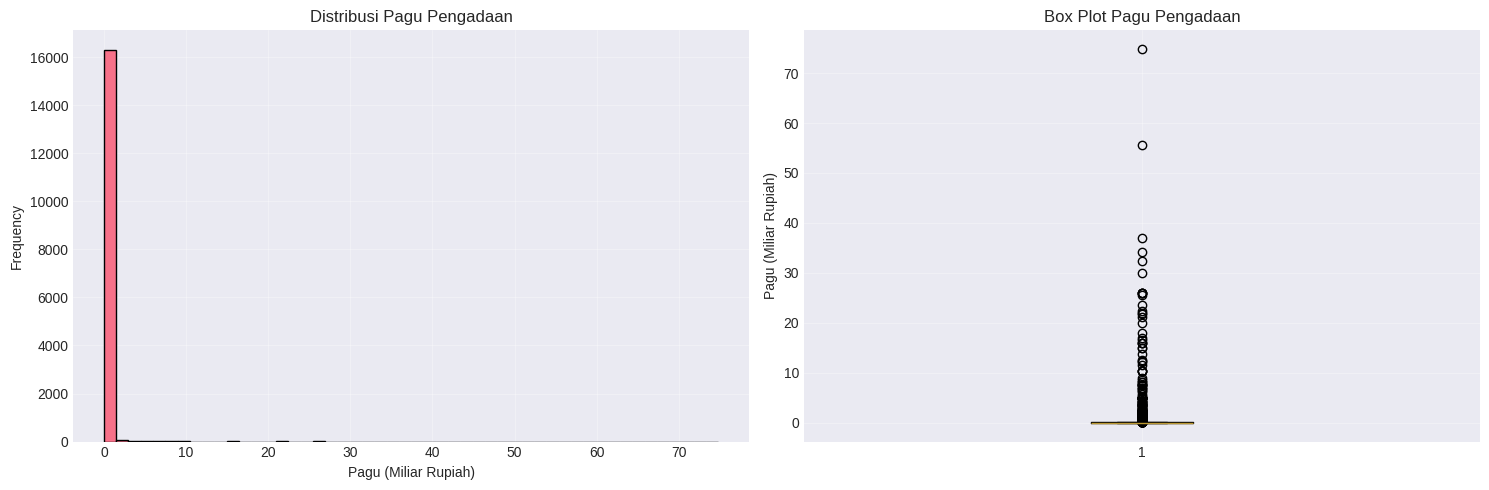

In [9]:
# Distribusi pagu
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['pagu'] / 1e9, bins=50, edgecolor='black')
axes[0].set_xlabel('Pagu (Miliar Rupiah)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribusi Pagu Pengadaan')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['pagu'] / 1e9)
axes[1].set_ylabel('Pagu (Miliar Rupiah)')
axes[1].set_title('Box Plot Pagu Pengadaan')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Analisis Metode Pengadaan

In [10]:
# Distribusi metode pengadaan
print("📋 Distribusi Metode Pengadaan:")
metode_dist = df['metode_pengadaan'].value_counts()
print(metode_dist)
print(f"\nTotal metode pengadaan: {len(metode_dist)}")

📋 Distribusi Metode Pengadaan:
metode_pengadaan
E-Purchasing           11245
Pengadaan Langsung      4515
Dikecualikan             497
Tender                    77
Penunjukan Langsung       48
Seleksi                   44
Tender Cepat               3
Kontes                     1
Name: count, dtype: int64

Total metode pengadaan: 8


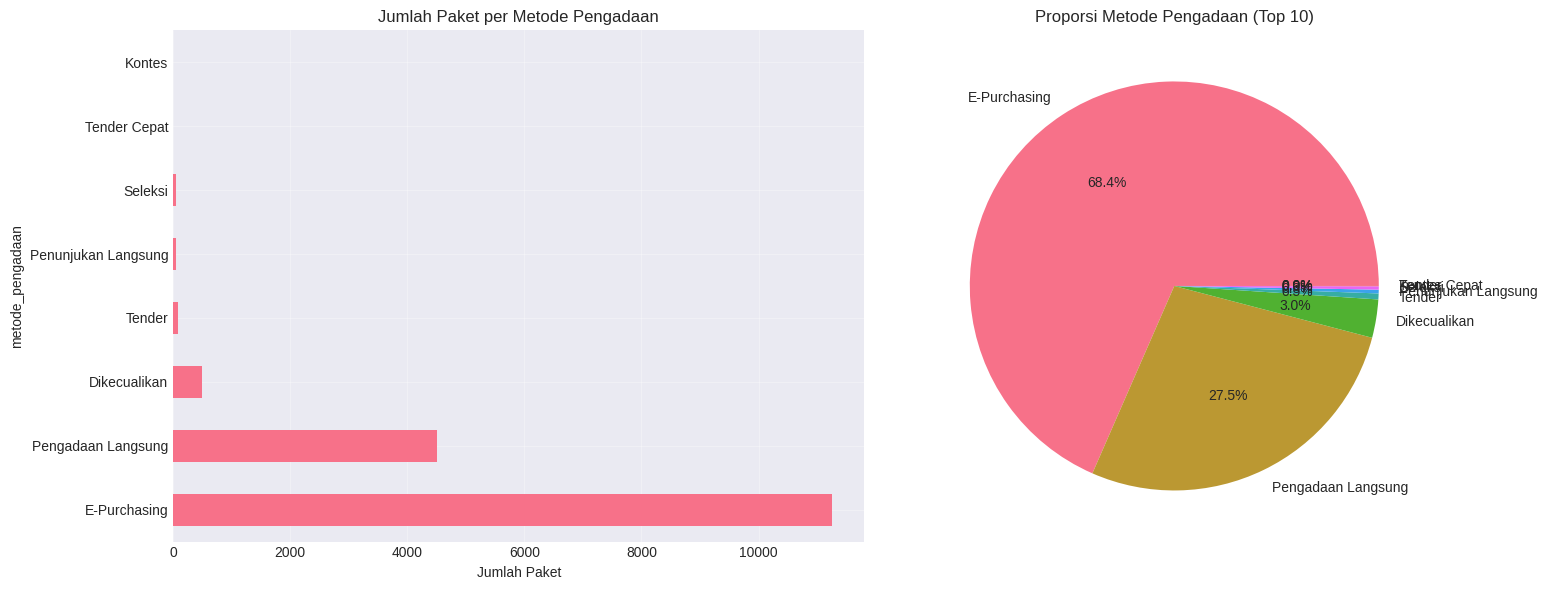

In [11]:
# Visualisasi metode pengadaan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
metode_dist.plot(kind='barh', ax=axes[0])
axes[0].set_xlabel('Jumlah Paket')
axes[0].set_title('Jumlah Paket per Metode Pengadaan')
axes[0].grid(True, alpha=0.3)

# Pie chart (top 5)
metode_dist.head(10).plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_ylabel('')
axes[1].set_title('Proporsi Metode Pengadaan (Top 10)')

plt.tight_layout()
plt.show()

In [12]:
# Total pagu per metode pengadaan
print("💰 Total Pagu per Metode Pengadaan:")
pagu_per_metode = df.groupby('metode_pengadaan')['pagu'].sum().sort_values(ascending=False)
pagu_per_metode_billion = pagu_per_metode / 1e9

for metode, pagu in pagu_per_metode_billion.items():
    print(f"{metode}: Rp {pagu:,.2f} Miliar")

💰 Total Pagu per Metode Pengadaan:
Pengadaan Langsung: Rp 706.99 Miliar
E-Purchasing: Rp 644.44 Miliar
Tender: Rp 569.15 Miliar
Dikecualikan: Rp 148.14 Miliar
Seleksi: Rp 32.41 Miliar
Penunjukan Langsung: Rp 7.20 Miliar
Tender Cepat: Rp 3.33 Miliar
Kontes: Rp 0.00 Miliar


## 7. Analisis Jenis Pengadaan

In [13]:
# Distribusi jenis pengadaan
print("📦 Distribusi Jenis Pengadaan:")
jenis_dist = df['jenis_pengadaan'].value_counts()
print(jenis_dist)

📦 Distribusi Jenis Pengadaan:
jenis_pengadaan
Barang                  10530
Pekerjaan Konstruksi     2905
Jasa Lainnya             1678
Jasa Konsultansi         1315
Barang;Barang               1
Name: count, dtype: int64


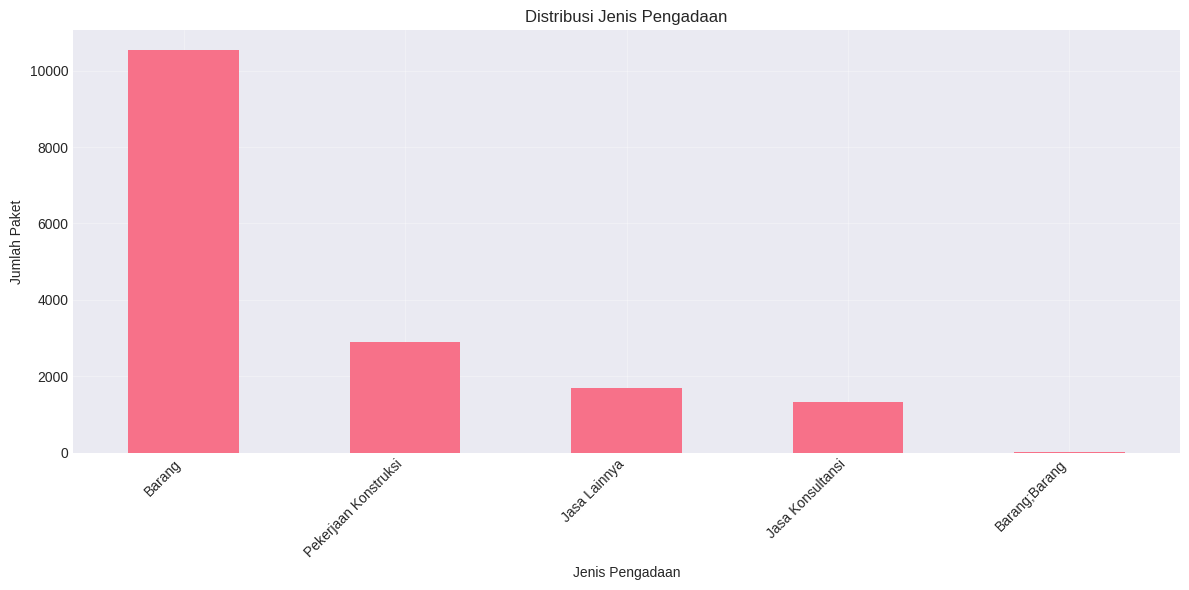

In [14]:
# Visualisasi jenis pengadaan
plt.figure(figsize=(12, 6))
jenis_dist.plot(kind='bar')
plt.xlabel('Jenis Pengadaan')
plt.ylabel('Jumlah Paket')
plt.title('Distribusi Jenis Pengadaan')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Analisis K/L/PD (Kementerian/Lembaga/Pemerintah Daerah)

In [15]:
# Top 10 KLPD berdasarkan jumlah paket
print("🏛️ Top 10 K/L/PD berdasarkan Jumlah Paket:")
top_klpd_count = df['nama_klpd'].value_counts().head(10)
print(top_klpd_count)

🏛️ Top 10 K/L/PD berdasarkan Jumlah Paket:
nama_klpd
Provinsi Kalimantan Barat    16430
Name: count, dtype: int64


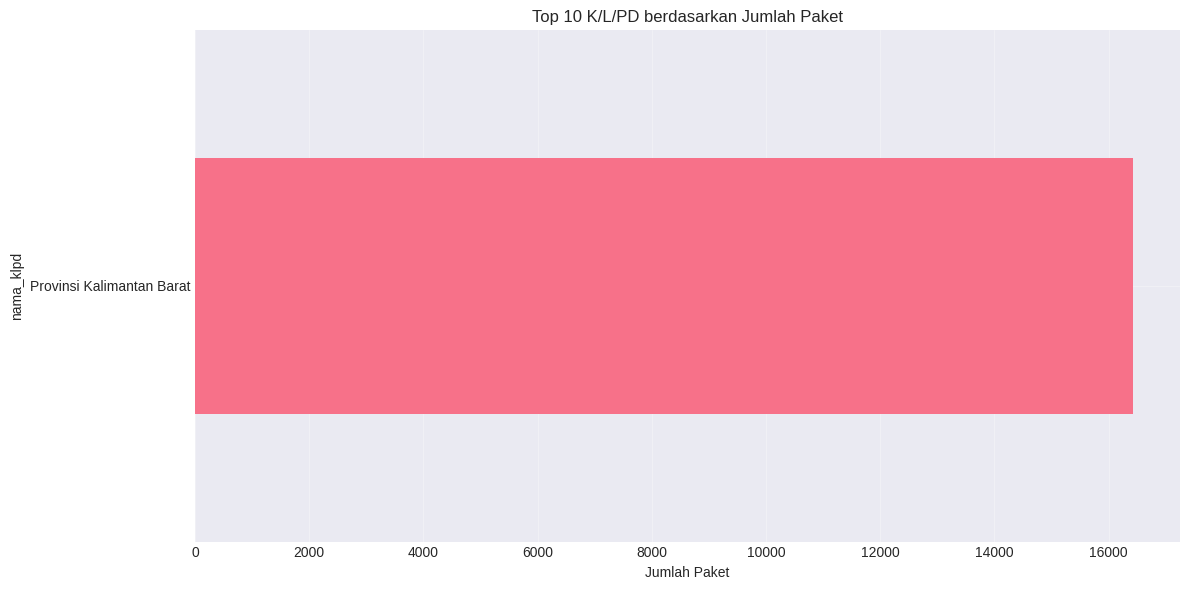

In [16]:
# Visualisasi top 10 KLPD
plt.figure(figsize=(12, 6))
top_klpd_count.plot(kind='barh')
plt.xlabel('Jumlah Paket')
plt.title('Top 10 K/L/PD berdasarkan Jumlah Paket')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
# Top 10 KLPD berdasarkan total pagu
print("💰 Top 10 K/L/PD berdasarkan Total Pagu:")
top_klpd_pagu = df.groupby('nama_klpd')['pagu'].sum().sort_values(ascending=False).head(10)
top_klpd_pagu_billion = top_klpd_pagu / 1e9

for klpd, pagu in top_klpd_pagu_billion.items():
    print(f"{klpd}: Rp {pagu:,.2f} Miliar")

💰 Top 10 K/L/PD berdasarkan Total Pagu:
Provinsi Kalimantan Barat: Rp 2,111.67 Miliar


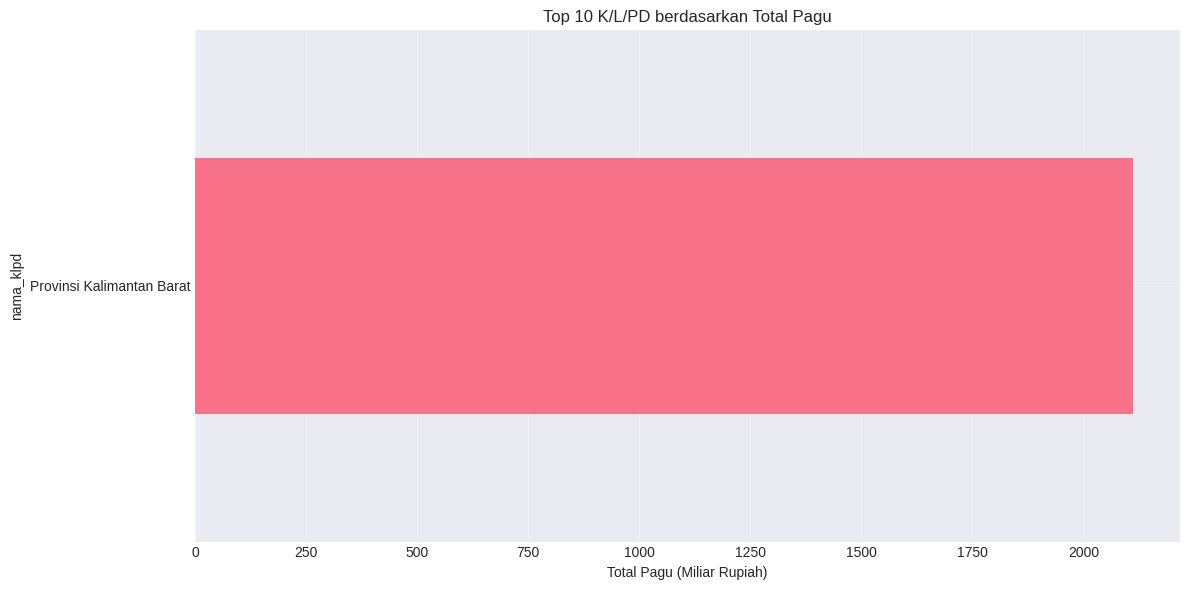

In [18]:
# Visualisasi top 10 KLPD by pagu
plt.figure(figsize=(12, 6))
(top_klpd_pagu / 1e9).plot(kind='barh')
plt.xlabel('Total Pagu (Miliar Rupiah)')
plt.title('Top 10 K/L/PD berdasarkan Total Pagu')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Analisis Status PDN, UKM, dan PRADIPA

In [19]:
# Analisis status PDN (Produk Dalam Negeri)
print("🇮🇩 Status PDN (Produk Dalam Negeri):")
pdn_dist = df['status_pdn'].value_counts()
print(pdn_dist)
print(f"\nPersentase PDN: {(pdn_dist.get('Ya', 0) / len(df)) * 100:.2f}%")

🇮🇩 Status PDN (Produk Dalam Negeri):
status_pdn
PDN        16397
Non-PDN       33
Name: count, dtype: int64

Persentase PDN: 0.00%


In [20]:
# Analisis status UKM (Usaha Kecil Menengah)
print("🏪 Status UKM (Usaha Kecil Menengah):")
ukm_dist = df['status_ukm'].value_counts()
print(ukm_dist)
print(f"\nPersentase UKM: {(ukm_dist.get('Ya', 0) / len(df)) * 100:.2f}%")

🏪 Status UKM (Usaha Kecil Menengah):
status_ukm
UKM        16372
Non-UKM       58
Name: count, dtype: int64

Persentase UKM: 0.00%


In [21]:
# Analisis status PRADIPA
print("📱 Status PRADIPA:")
pradipa_dist = df['status_pradipa'].value_counts()
print(pradipa_dist)
print(f"\nPersentase PRADIPA: {(pradipa_dist.get('Ya', 0) / len(df)) * 100:.2f}%")

📱 Status PRADIPA:
status_pradipa
Non-PraDIPA    16329
PraDIPA          101
Name: count, dtype: int64

Persentase PRADIPA: 0.00%


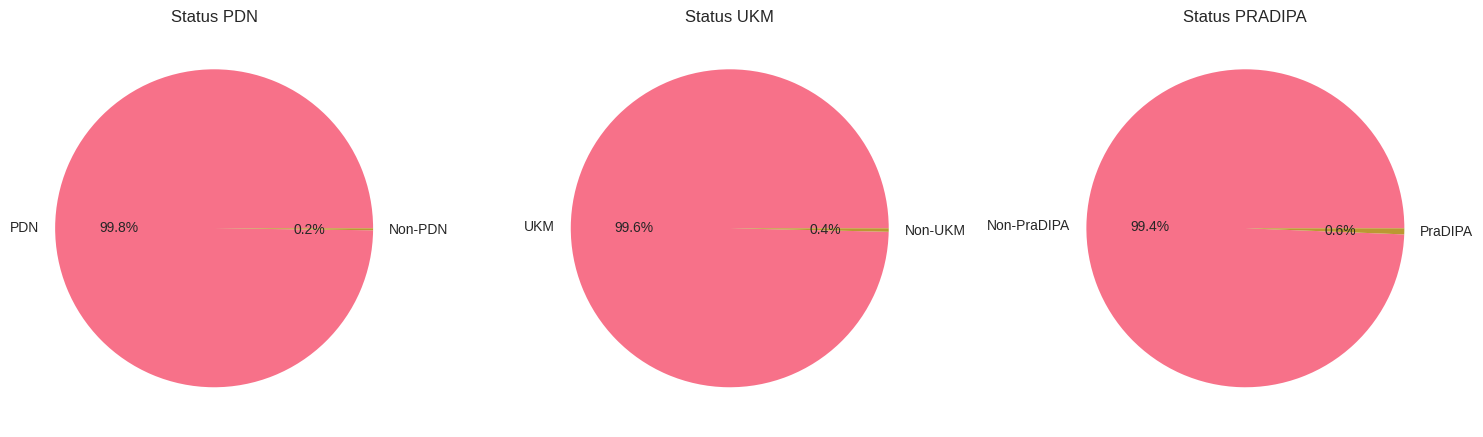

In [22]:
# Visualisasi status
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# PDN
pdn_dist.plot(kind='pie', ax=axes[0], autopct='%1.1f%%')
axes[0].set_ylabel('')
axes[0].set_title('Status PDN')

# UKM
ukm_dist.plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_ylabel('')
axes[1].set_title('Status UKM')

# PRADIPA
pradipa_dist.plot(kind='pie', ax=axes[2], autopct='%1.1f%%')
axes[2].set_ylabel('')
axes[2].set_title('Status PRADIPA')

plt.tight_layout()
plt.show()

## 10. Analisis Timeline Pengadaan

In [23]:
# Convert date columns
date_columns = ['tgl_awal_pemilihan', 'tgl_akhir_pemilihan', 
                'tgl_awal_kontrak', 'tgl_akhir_kontrak', 
                'tgl_buat_paket', 'tgl_pengumuman_paket']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print("✅ Date columns converted")

✅ Date columns converted


In [24]:
# Analisis bulan pengumuman paket
df['bulan_pengumuman'] = df['tgl_pengumuman_paket'].dt.month_name()
bulan_pengumuman_dist = df['bulan_pengumuman'].value_counts()

print("📅 Distribusi Bulan Pengumuman Paket:")
print(bulan_pengumuman_dist)

📅 Distribusi Bulan Pengumuman Paket:
bulan_pengumuman
March        4436
February     2875
May          2731
October      2503
January      1871
April         621
July          570
December      273
June          173
September     172
August        145
November       60
Name: count, dtype: int64


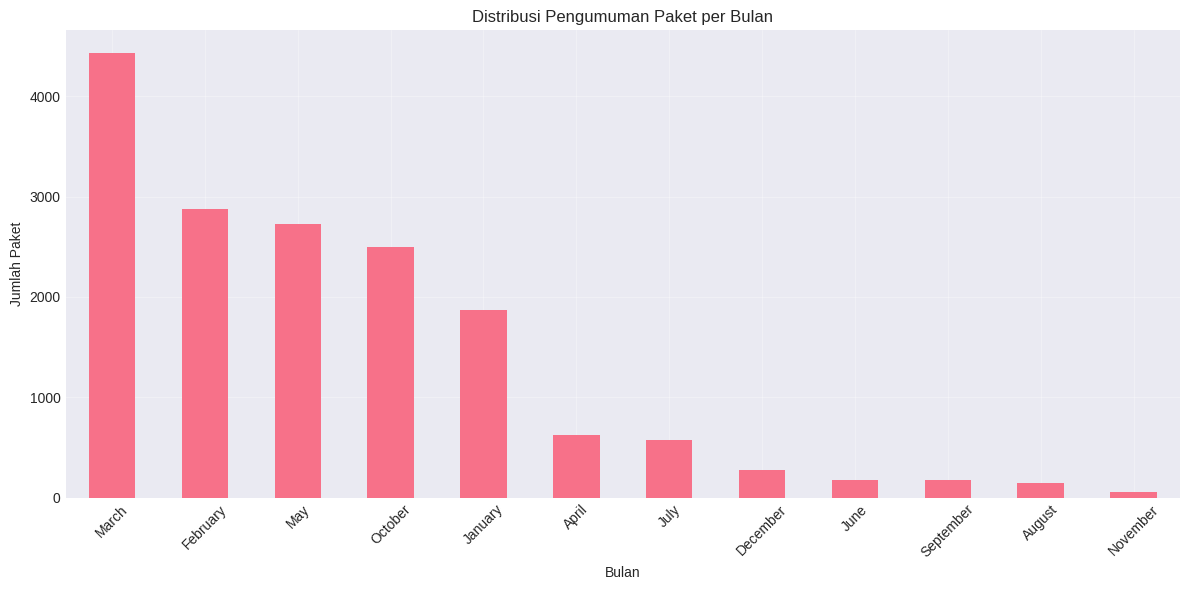

In [25]:
# Visualisasi timeline
plt.figure(figsize=(12, 6))
bulan_pengumuman_dist.plot(kind='bar')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Paket')
plt.title('Distribusi Pengumuman Paket per Bulan')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 11. Summary & Key Insights

In [26]:
print("="*80)
print("📊 KEY INSIGHTS - DATA RUP 2025")
print("="*80)

print(f"\n1️⃣ OVERVIEW:")
print(f"   • Total Paket Pengadaan: {len(df):,}")
print(f"   • Total Pagu: Rp {df['pagu'].sum() / 1e12:,.2f} Triliun")
print(f"   • Rata-rata Pagu per Paket: Rp {df['pagu'].mean() / 1e6:,.2f} Juta")

print(f"\n2️⃣ METODE PENGADAAN:")
top_metode = df['metode_pengadaan'].value_counts().head(1)
print(f"   • Metode Terbanyak: {top_metode.index[0]} ({top_metode.values[0]:,} paket)")

print(f"\n3️⃣ JENIS PENGADAAN:")
top_jenis = df['jenis_pengadaan'].value_counts().head(1)
print(f"   • Jenis Terbanyak: {top_jenis.index[0]} ({top_jenis.values[0]:,} paket)")

print(f"\n4️⃣ K/L/PD TERBESAR:")
top_klpd = df['nama_klpd'].value_counts().head(1)
print(f"   • {top_klpd.index[0]}: {top_klpd.values[0]:,} paket")

print(f"\n5️⃣ STATUS KHUSUS:")
print(f"   • PDN: {(df['status_pdn'] == 'Ya').sum():,} paket ({(df['status_pdn'] == 'Ya').sum() / len(df) * 100:.1f}%)")
print(f"   • UKM: {(df['status_ukm'] == 'Ya').sum():,} paket ({(df['status_ukm'] == 'Ya').sum() / len(df) * 100:.1f}%)")
print(f"   • PRADIPA: {(df['status_pradipa'] == 'Ya').sum():,} paket ({(df['status_pradipa'] == 'Ya').sum() / len(df) * 100:.1f}%)")

print("\n" + "="*80)

📊 KEY INSIGHTS - DATA RUP 2025

1️⃣ OVERVIEW:
   • Total Paket Pengadaan: 16,430
   • Total Pagu: Rp 2.11 Triliun
   • Rata-rata Pagu per Paket: Rp 128.53 Juta

2️⃣ METODE PENGADAAN:
   • Metode Terbanyak: E-Purchasing (11,245 paket)

3️⃣ JENIS PENGADAAN:
   • Jenis Terbanyak: Barang (10,530 paket)

4️⃣ K/L/PD TERBESAR:
   • Provinsi Kalimantan Barat: 16,430 paket

5️⃣ STATUS KHUSUS:
   • PDN: 0 paket (0.0%)
   • UKM: 0 paket (0.0%)
   • PRADIPA: 0 paket (0.0%)



## 12. Export Data Summary

In [27]:
# Create summary DataFrame
summary_data = {
    'Metric': [
        'Total Paket',
        'Total Pagu (Triliun Rp)',
        'Rata-rata Pagu (Juta Rp)',
        'Median Pagu (Juta Rp)',
        'Jumlah K/L/PD',
        'Paket PDN (%)',
        'Paket UKM (%)',
        'Paket PRADIPA (%)'
    ],
    'Value': [
        f"{len(df):,}",
        f"{df['pagu'].sum() / 1e12:.2f}",
        f"{df['pagu'].mean() / 1e6:.2f}",
        f"{df['pagu'].median() / 1e6:.2f}",
        f"{df['nama_klpd'].nunique():,}",
        f"{(df['status_pdn'] == 'Ya').sum() / len(df) * 100:.1f}",
        f"{(df['status_ukm'] == 'Ya').sum() / len(df) * 100:.1f}",
        f"{(df['status_pradipa'] == 'Ya').sum() / len(df) * 100:.1f}"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("📋 Summary Report:")
print(summary_df.to_string(index=False))

📋 Summary Report:
                  Metric  Value
             Total Paket 16,430
 Total Pagu (Triliun Rp)   2.11
Rata-rata Pagu (Juta Rp) 128.53
   Median Pagu (Juta Rp)   8.35
           Jumlah K/L/PD      1
           Paket PDN (%)    0.0
           Paket UKM (%)    0.0
       Paket PRADIPA (%)    0.0


## 🎯 Kesimpulan

Dari analisis eksploratori data RUP 2025 ini, kita dapat menyimpulkan:

1. **Volume & Nilai**: Dataset mencakup ribuan paket pengadaan dengan total nilai triliunan rupiah
2. **Distribusi**: Terdapat variasi yang signifikan dalam nilai pagu pengadaan
3. **Metode**: Beberapa metode pengadaan mendominasi, menunjukkan preferensi sistem
4. **Partisipasi**: Ada fokus pada penggunaan produk dalam negeri (PDN) dan UKM
5. **Digitalisasi**: Status PRADIPA menunjukkan tingkat adopsi platform digital

### Next Steps:
- Analisis lebih mendalam dengan DuckDB untuk query kompleks
- Time series analysis untuk tren temporal
- Korelasi antara variabel-variabel kunci
- Pembuatan dashboard interaktif dengan Streamlit